In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11b15600c21ec8436253b1011f66057d


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | doctor pedro p. pena
City not found. Skipping...
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | umea
Processing Record 9 of Set 1 | cienfuegos
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 16 of Set 1 | arman
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | puerto colombia
Processing Record 21 of Set 1 | la ronge
Processing Record 22

Processing Record 35 of Set 4 | camabatela
Processing Record 36 of Set 4 | port lincoln
Processing Record 37 of Set 4 | kalianget
Processing Record 38 of Set 4 | kifri
Processing Record 39 of Set 4 | filingue
Processing Record 40 of Set 4 | beloha
Processing Record 41 of Set 4 | yamada
Processing Record 42 of Set 4 | cheuskiny
City not found. Skipping...
Processing Record 43 of Set 4 | ishigaki
Processing Record 44 of Set 4 | shiyan
Processing Record 45 of Set 4 | zabol
Processing Record 46 of Set 4 | kirakira
Processing Record 47 of Set 4 | warqla
City not found. Skipping...
Processing Record 48 of Set 4 | shimoda
Processing Record 49 of Set 4 | kodiak
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | kuntaur
Processing Record 2 of Set 5 | rio de janeiro
Processing Record 3 of Set 5 | elko
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | nianzishan
Processing Record 6 of Set 5 | ilulissat
Processing Record 7 of Set 5 | matara
Processing Rec

Processing Record 25 of Set 8 | zeya
Processing Record 26 of Set 8 | tulun
Processing Record 27 of Set 8 | eyemouth
Processing Record 28 of Set 8 | yangjiang
Processing Record 29 of Set 8 | zelenogorskiy
Processing Record 30 of Set 8 | plettenberg bay
Processing Record 31 of Set 8 | abu samrah
Processing Record 32 of Set 8 | bagdarin
Processing Record 33 of Set 8 | east retford
City not found. Skipping...
Processing Record 34 of Set 8 | kruisfontein
Processing Record 35 of Set 8 | mangaratiba
Processing Record 36 of Set 8 | san patricio
Processing Record 37 of Set 8 | torbay
Processing Record 38 of Set 8 | lolua
City not found. Skipping...
Processing Record 39 of Set 8 | craig
Processing Record 40 of Set 8 | iquique
Processing Record 41 of Set 8 | komsomolskiy
Processing Record 42 of Set 8 | beaufort
Processing Record 43 of Set 8 | tuy hoa
Processing Record 44 of Set 8 | poronaysk
Processing Record 45 of Set 8 | chernyshevskiy
Processing Record 46 of Set 8 | benalla
Processing Record 4

Processing Record 15 of Set 12 | cochrane
Processing Record 16 of Set 12 | sumbe
Processing Record 17 of Set 12 | itarema
Processing Record 18 of Set 12 | kungurtug
Processing Record 19 of Set 12 | quatre cocos
Processing Record 20 of Set 12 | sao joao da barra
Processing Record 21 of Set 12 | okha
Processing Record 22 of Set 12 | port hardy
Processing Record 23 of Set 12 | mahendranagar
Processing Record 24 of Set 12 | coquimbo
Processing Record 25 of Set 12 | am timan
Processing Record 26 of Set 12 | vila
Processing Record 27 of Set 12 | lokosovo
Processing Record 28 of Set 12 | filadelfia
Processing Record 29 of Set 12 | santa cruz de tenerife
Processing Record 30 of Set 12 | buzmeyin
Processing Record 31 of Set 12 | padang
Processing Record 32 of Set 12 | sarangani
Processing Record 33 of Set 12 | shenjiamen
Processing Record 34 of Set 12 | pangody
Processing Record 35 of Set 12 | fallon
Processing Record 36 of Set 12 | oxapampa
Processing Record 37 of Set 12 | north bend
Processin

In [10]:
len(city_data)


562

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,63.00,88,0,10.29,ZA,2020-05-08 22:53:50
1,Qaanaaq,77.48,-69.36,11.97,83,28,6.51,GL,2020-05-08 22:54:05
2,Namibe,-15.20,12.15,80.64,49,0,3.02,AO,2020-05-08 22:54:24
3,Arraial Do Cabo,-22.97,-42.03,71.56,60,33,8.70,BR,2020-05-08 22:54:04
4,Iqaluit,63.75,-68.51,33.80,50,75,12.75,CA,2020-05-08 22:53:59
5,Punta Arenas,-53.15,-70.92,48.20,70,71,10.29,CL,2020-05-08 22:53:42
6,Umea,63.83,20.26,39.20,86,97,14.99,SE,2020-05-08 23:02:16
7,Cienfuegos,22.15,-80.44,87.80,55,89,13.87,CU,2020-05-08 23:02:16
8,Hobart,-42.88,147.33,50.00,100,75,5.82,AU,2020-05-08 22:51:05
9,Rikitea,-23.12,-134.97,75.90,69,25,4.52,PF,2020-05-08 22:49:50


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2020-05-08 22:53:50,-33.93,18.42,63.00,88,0,10.29
1,Qaanaaq,GL,2020-05-08 22:54:05,77.48,-69.36,11.97,83,28,6.51
2,Namibe,AO,2020-05-08 22:54:24,-15.20,12.15,80.64,49,0,3.02
3,Arraial Do Cabo,BR,2020-05-08 22:54:04,-22.97,-42.03,71.56,60,33,8.70
4,Iqaluit,CA,2020-05-08 22:53:59,63.75,-68.51,33.80,50,75,12.75


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

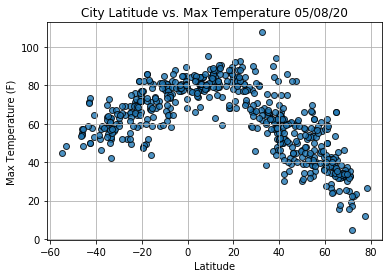

In [15]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

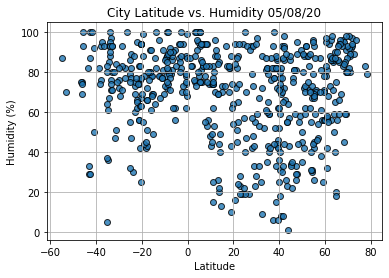

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

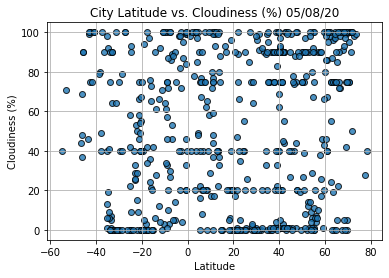

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

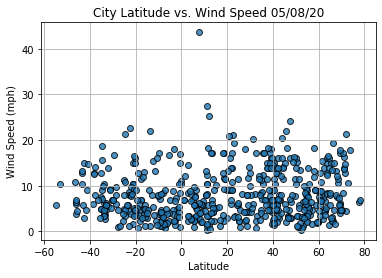

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                        Arman
Country                        RU
Date          2020-05-08 22:54:42
Lat                          59.7
Lng                        150.17
Max Temp                    39.31
Humidity                       71
Cloudiness                     20
Wind Speed                   2.08
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2020-05-08 22:54:05,77.48,-69.36,11.97,83,28,6.51
4,Iqaluit,CA,2020-05-08 22:53:59,63.75,-68.51,33.80,50,75,12.75
6,Umea,SE,2020-05-08 23:02:16,63.83,20.26,39.20,86,97,14.99
7,Cienfuegos,CU,2020-05-08 23:02:16,22.15,-80.44,87.80,55,89,13.87
11,Yellowknife,CA,2020-05-08 22:51:11,62.46,-114.35,42.80,56,75,13.87


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

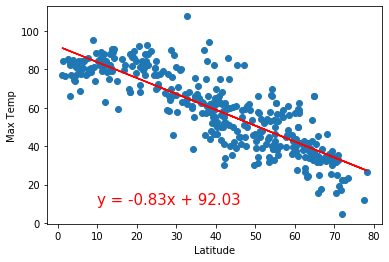

In [38]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,10))

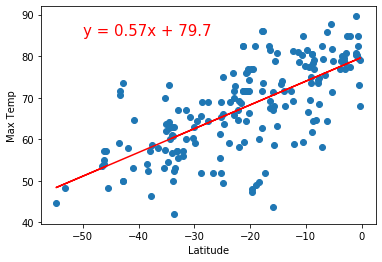

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,85))

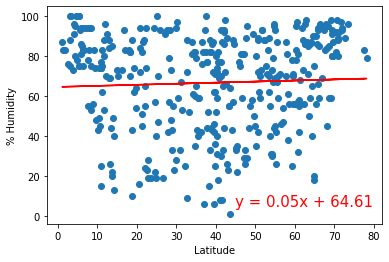

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,5))

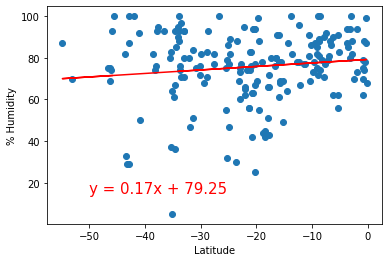

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

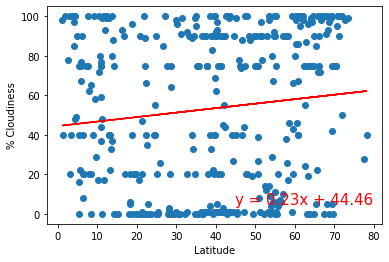

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,5))

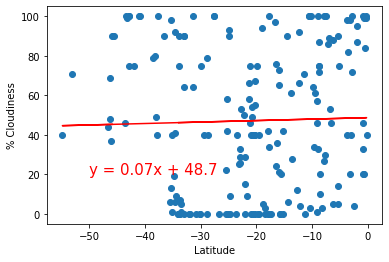

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,20))

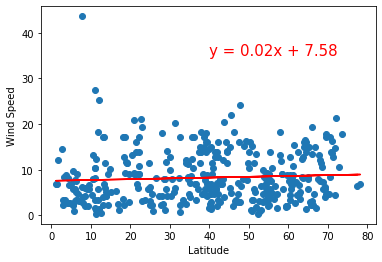

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

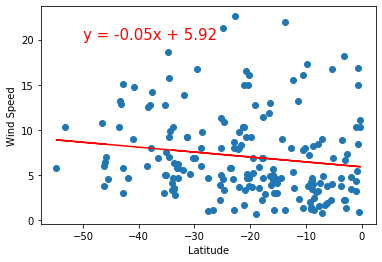

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))